**EDA bold text& Data Preparation:**

1. **Import Libraries** – pandas, numpy, matplotlib, seaborn, sklearn, etc.
2. **Upload & Load Dataset** – read CSV and display info.
3. **Basic Analysis** – shape, columns, missing values, unique values, stats.
4. **Check Missing Values** – visualized with heatmap.
5. **Check Duplicates** – counted and removed duplicate rows.
6. **Univariate Analysis** – count plots, histograms, KDE, swarm plots.
7. **Bivariate Analysis** – pair plots, violin plots, box plots.
8. **Multivariate Analysis** – correlation heatmap.
9. **Data Cleaning** – handle missing values, outliers, duplicates.
10. **Feature Engineering** – create new features (e.g., `Risk_Score`).
11. **Data Transformation** – scale numeric columns using StandardScaler.



Saving archive (3).zip to archive (3) (1).zip
Dataset Loaded Successfully!

                             Patient_ID  Age     Sex Family_History  \
0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   

   HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
0                     67       Moderate            Severe          8.80   
1                     38         Severe          Moderate          3.24   
2                     37         Severe          Moderate          1.01   
3                     50           Mild            Severe          3.21   
4                     48       Moderate              Mild          2.31   

   Brain_Volume_Loss  Functional_Capacity  ...

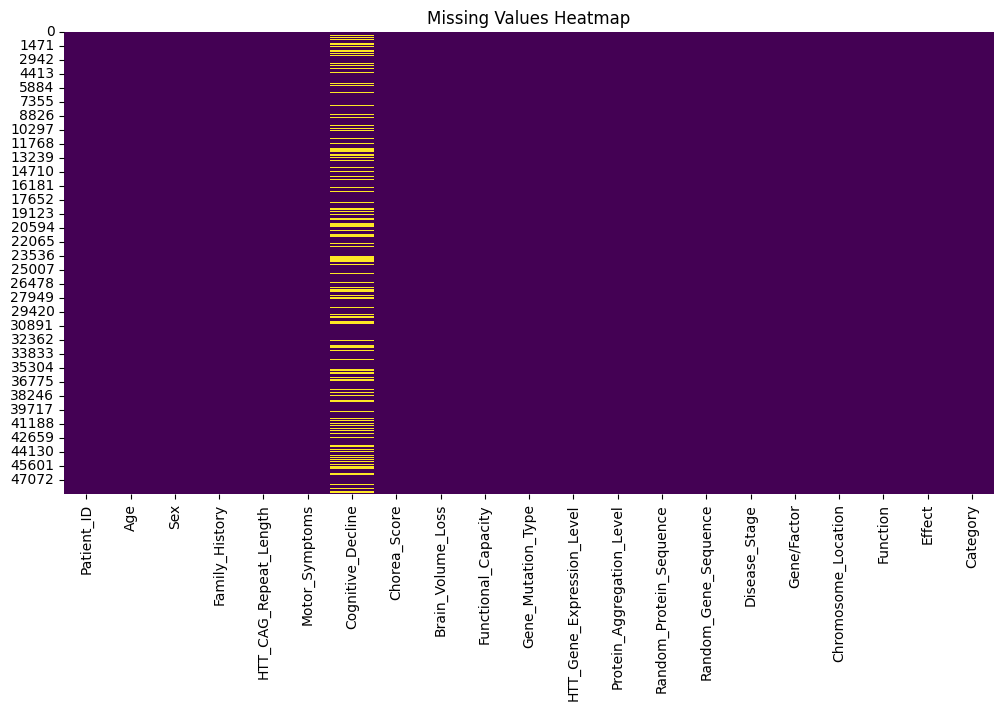

Total Duplicate Rows: 0



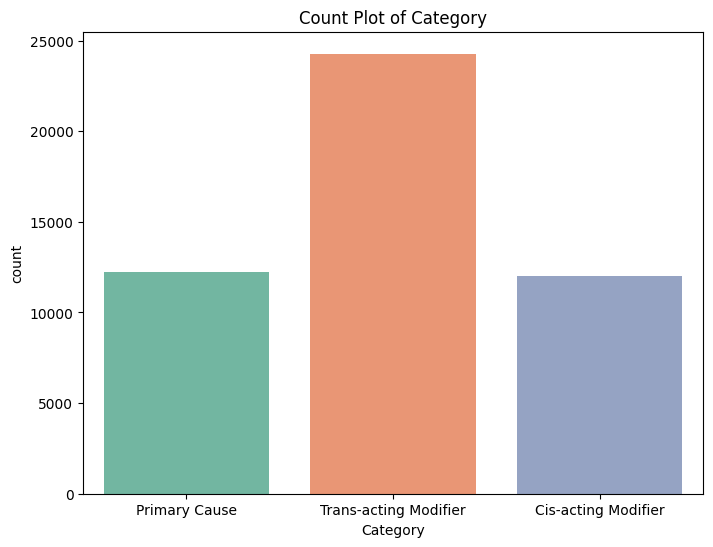

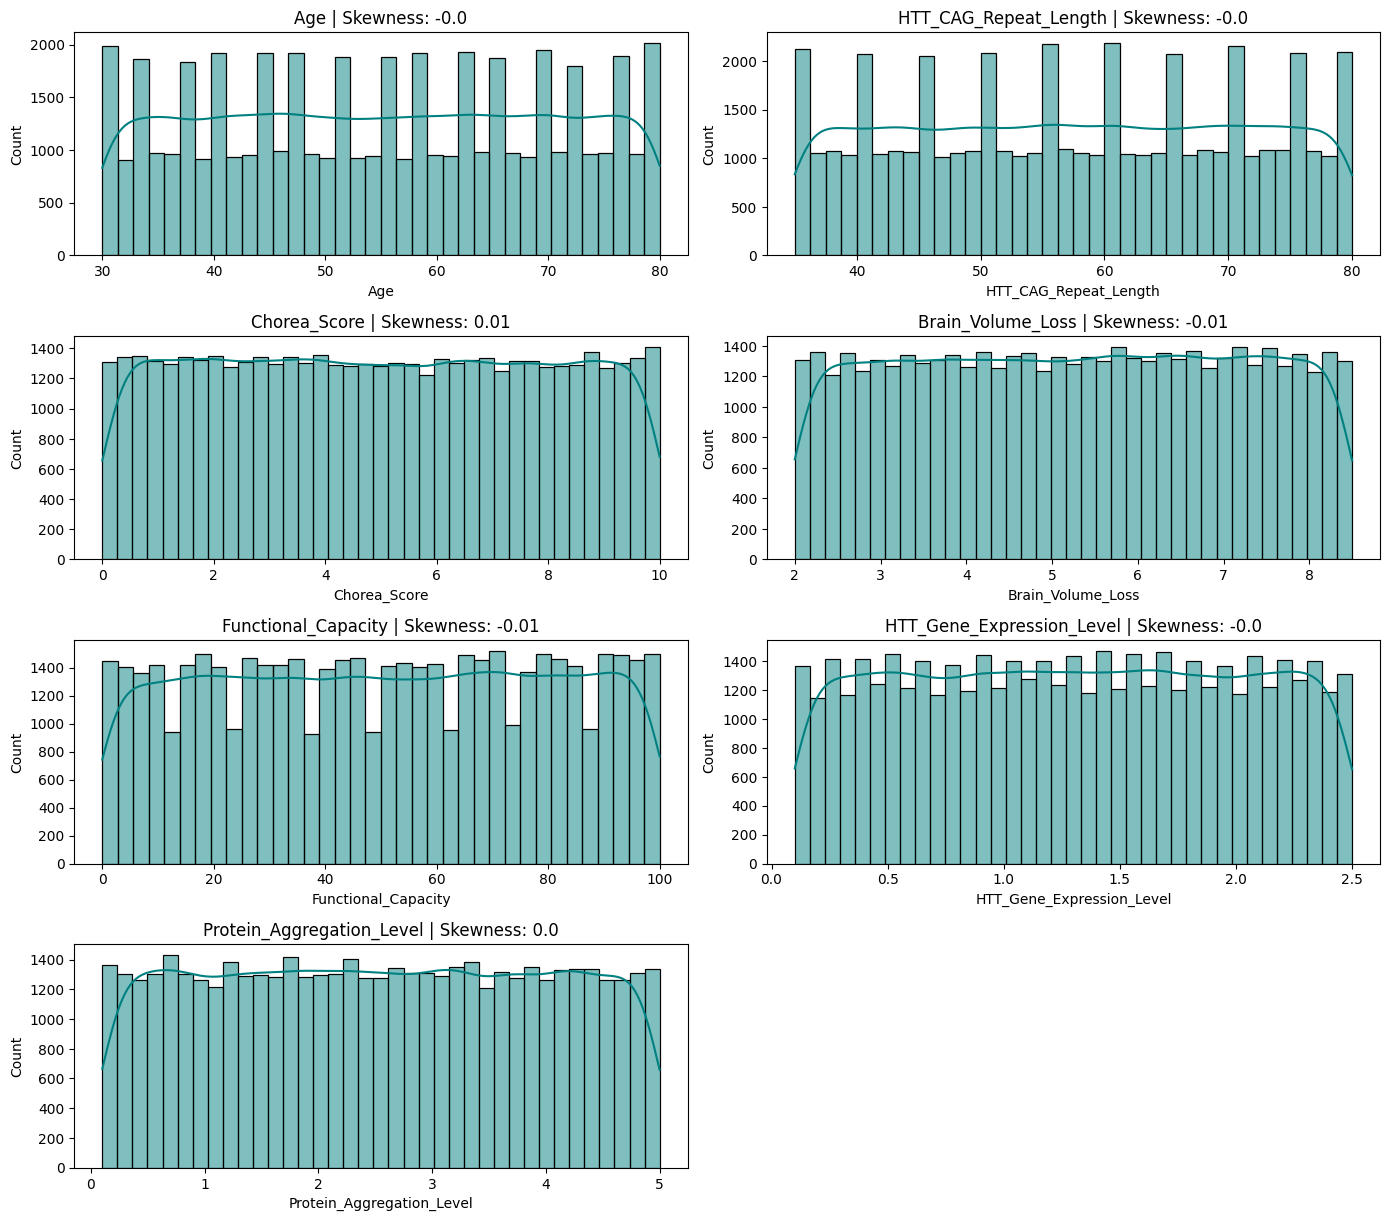

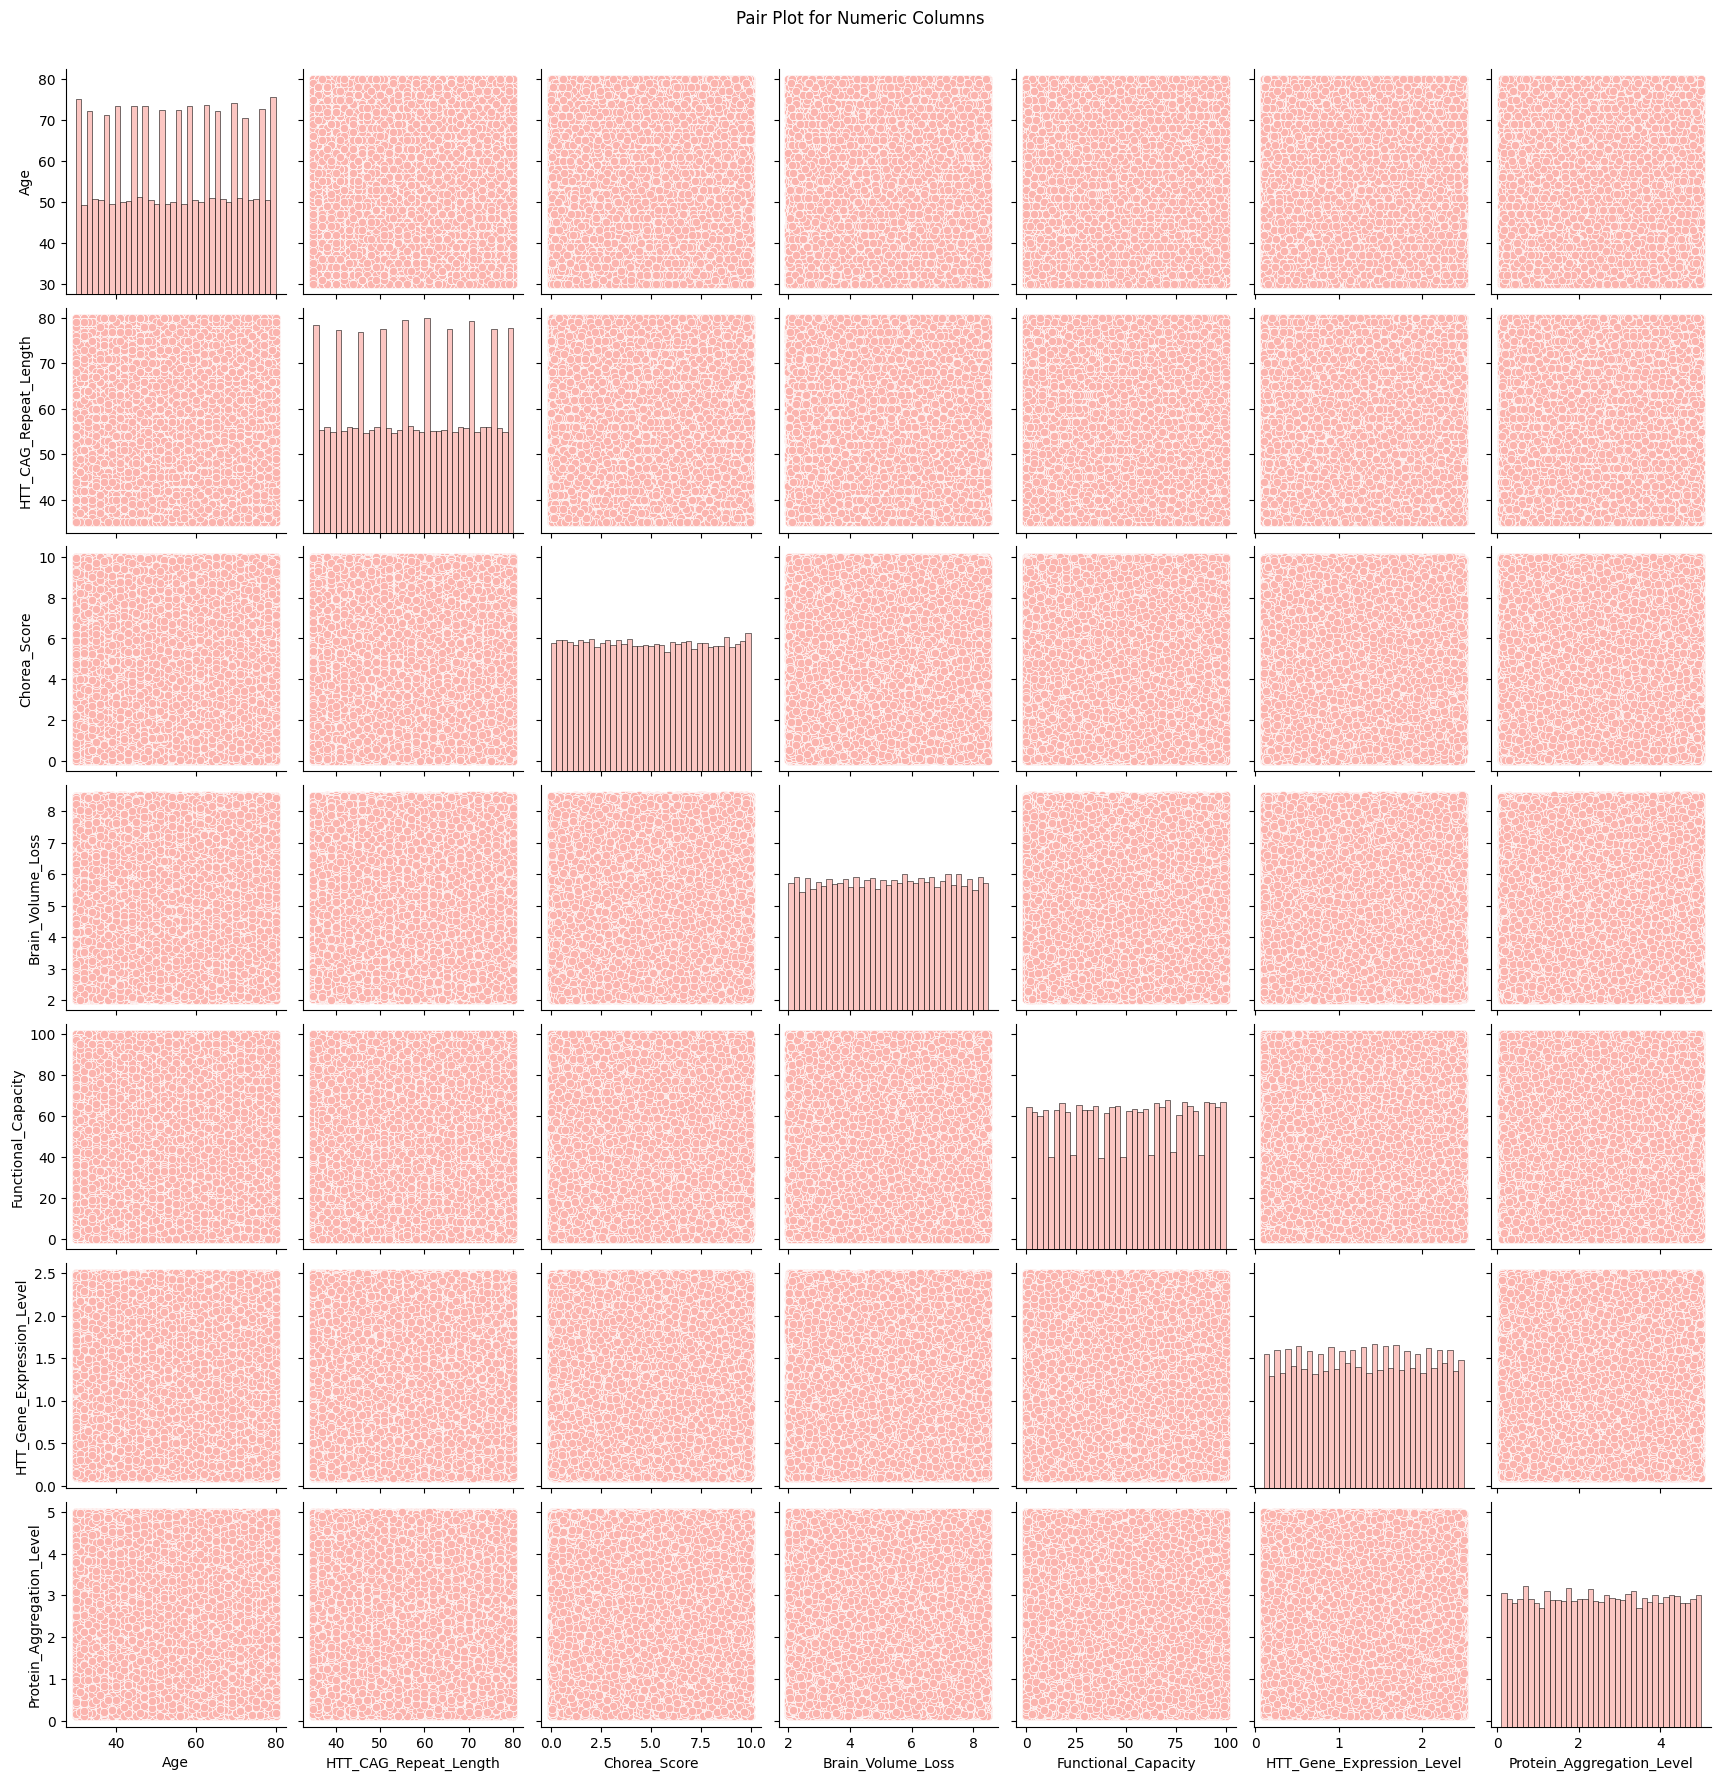

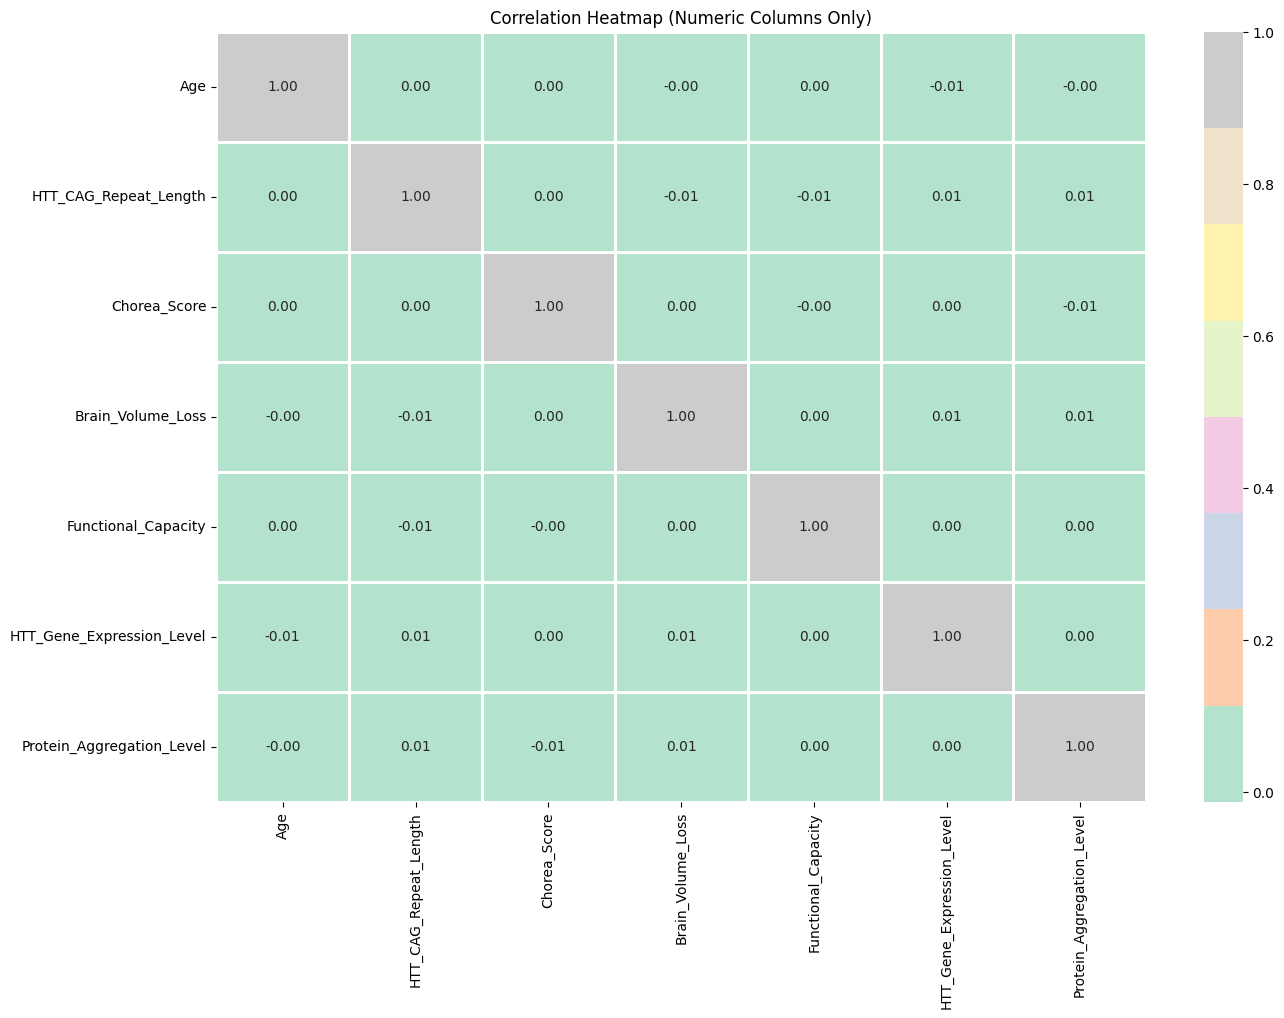

Final Cleaned Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48536 entries, 0 to 48535
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 48536 non-null  object 
 1   Age                        48536 non-null  float64
 2   Sex                        48536 non-null  object 
 3   Family_History             48536 non-null  object 
 4   HTT_CAG_Repeat_Length      48536 non-null  float64
 5   Motor_Symptoms             48536 non-null  object 
 6   Cognitive_Decline          48536 non-null  object 
 7   Chorea_Score               48536 non-null  float64
 8   Brain_Volume_Loss          48536 non-null  float64
 9   Functional_Capacity        48536 non-null  float64
 10  Gene_Mutation_Type         48536 non-null  object 
 11  HTT_Gene_Expression_Level  48536 non-null  float64
 12  Protein_Aggregation_Level  48536 non-null  float64
 13  Random_Protein_Se

In [2]:
# ===================== STEP 1: IMPORT REQUIRED LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import files
import warnings as wr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
wr.filterwarnings('ignore')

# ===================== STEP 2: UPLOAD AND LOAD DATASET =====================
uploaded = files.upload()  # Upload your Huntington dataset zip
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/")

extracted_files = os.listdir("/content/")
csv_file = [f for f in extracted_files if f.endswith(".csv")][0]
csv_path = os.path.join("/content/", csv_file)

df = pd.read_csv(csv_path)
print("Dataset Loaded Successfully!\n")
print(df.head(), "\n")
print("Dataset Info:\n")
print(df.info(), "\n")

# ===================== STEP 3: ANALYZING THE DATA =====================
print("Dataset Shape:", df.shape, "\n")
print("Columns:", df.columns.tolist(), "\n")
print("Missing Values per Column:\n", df.isnull().sum(), "\n")
print("Unique Values per Column:\n", df.nunique(), "\n")
print("Statistical Summary (Numeric Columns):\n", df.describe().T, "\n")

# ===================== STEP 4: CHECKING MISSING VALUES =====================
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# ===================== STEP 5: CHECKING DUPLICATES =====================
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}\n")
df.drop_duplicates(inplace=True)

# ===================== STEP 6: UNIVARIATE ANALYSIS =====================
# Count plot for target column (replace 'Status' with your target column if different)
target_column = 'Status' if 'Status' in df.columns else df.columns[-1]
plt.figure(figsize=(8,6))
sns.countplot(x=target_column, data=df, palette='Set2')
plt.title(f'Count Plot of {target_column}')
plt.show()

# Histograms + KDE for numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(14, len(numeric_cols)*3))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"{col} | Skewness: {round(df[col].skew(),2)}")
plt.tight_layout()
plt.show()

# Swarm Plot example
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.swarmplot(x='Status', y='Age', data=df, palette='viridis')
    plt.title('Swarm Plot for Status vs Age')
    plt.show()

# ===================== STEP 7: BIVARIATE ANALYSIS =====================
# Pairplot (numeric only)
sns.set_palette("Pastel1")
sns.pairplot(df.select_dtypes(include=['int64','float64']))
plt.suptitle('Pair Plot for Numeric Columns', y=1.02)
plt.show()

# Violin plot example
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Status', y='Age', data=df, palette='Set3', alpha=0.7)
    plt.title('Violin Plot: Status vs Age')
    plt.show()

# Box plot example
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Status', y='Age', data=df)
    plt.title('Box Plot: Status vs Age')
    plt.show()

# ===================== STEP 8: MULTIVARIATE ANALYSIS =====================
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# ===================== STEP 9: DATA CLEANING & PREPARATION =====================
# Handle missing values
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Handle outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# ===================== STEP 10: FEATURE ENGINEERING =====================
# Example: Risk score based on Age and CAG repeats (if columns exist)
if 'Age' in df.columns and 'CAG_repeats' in df.columns:
    df['Risk_Score'] = df['Age'] * df['CAG_repeats']

# ===================== STEP 11: DATA TRANSFORMATION =====================
# Standard scaling for numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display final cleaned dataset info
print("Final Cleaned Dataset Info:\n")
print(df.info())
print("\nHead of Cleaned Dataset:\n")
print(df.head())



==== STEP 1: Libraries Imported Successfully ====



Saving archive (3).zip to archive (3) (2).zip

==== STEP 2: Dataset Loaded Successfully ====

                             Patient_ID  Age     Sex Family_History  \
0  b2a49170-8561-4665-9371-2240b55dd87a   31    Male             No   
1  f5fae45d-8718-41c4-a957-6928f79f3c8e   33  Female            Yes   
2  66ab0567-050b-4d56-9ec4-b676309899a6   69    Male            Yes   
3  996a48e4-e841-418f-a539-5a7a86cd815d   66    Male            Yes   
4  d45c7ca8-7125-4aaa-8018-5bbc60d35a1f   43  Female            Yes   

   HTT_CAG_Repeat_Length Motor_Symptoms Cognitive_Decline  Chorea_Score  \
0                     67       Moderate            Severe          8.80   
1                     38         Severe          Moderate          3.24   
2                     37         Severe          Moderate          1.01   
3                     50           Mild            Severe          3.21   
4                     48       Moderate              Mild          2.31   

   Brain_Volume_Loss  Functi

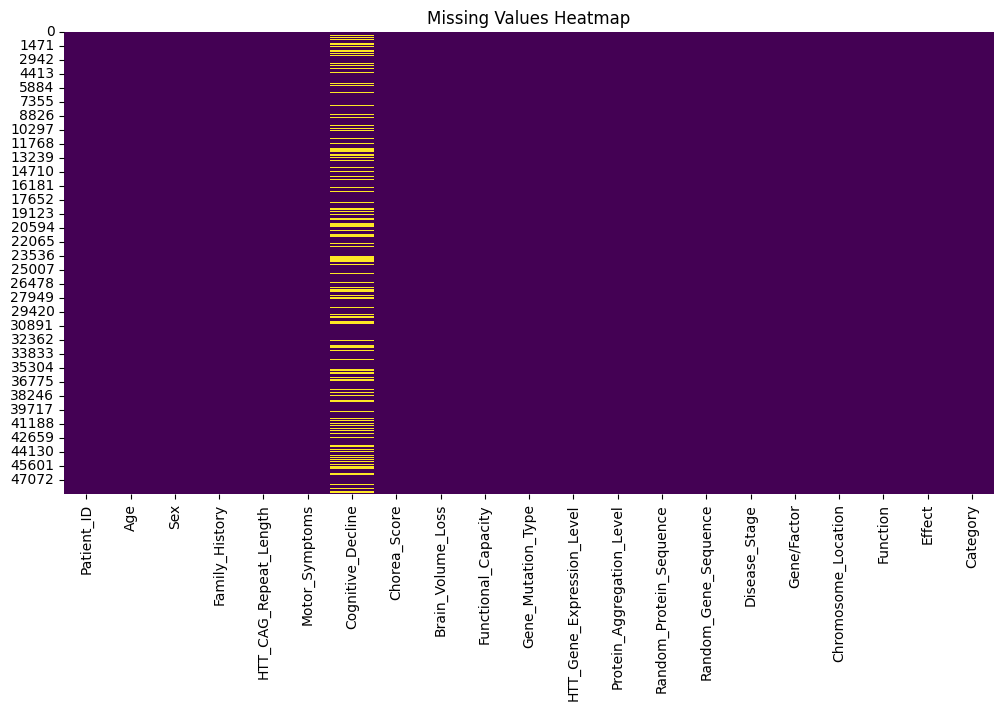


==== STEP 5: Checking Duplicates ====

Total Duplicate Rows: 0


==== STEP 6: Univariate Analysis ====



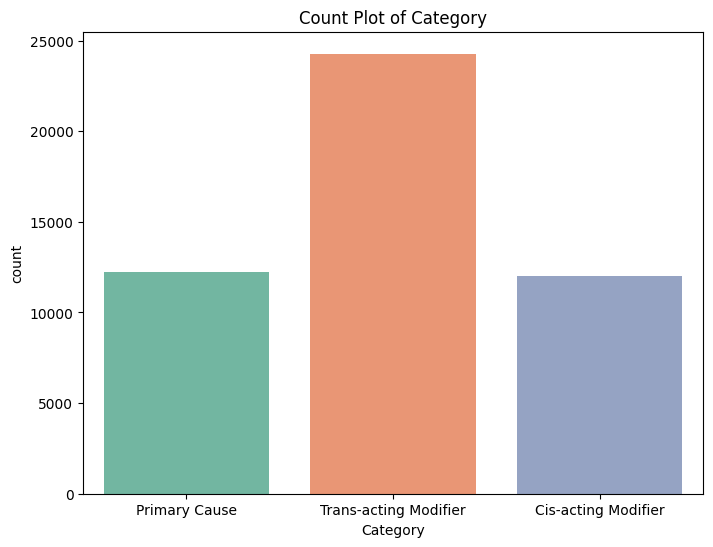

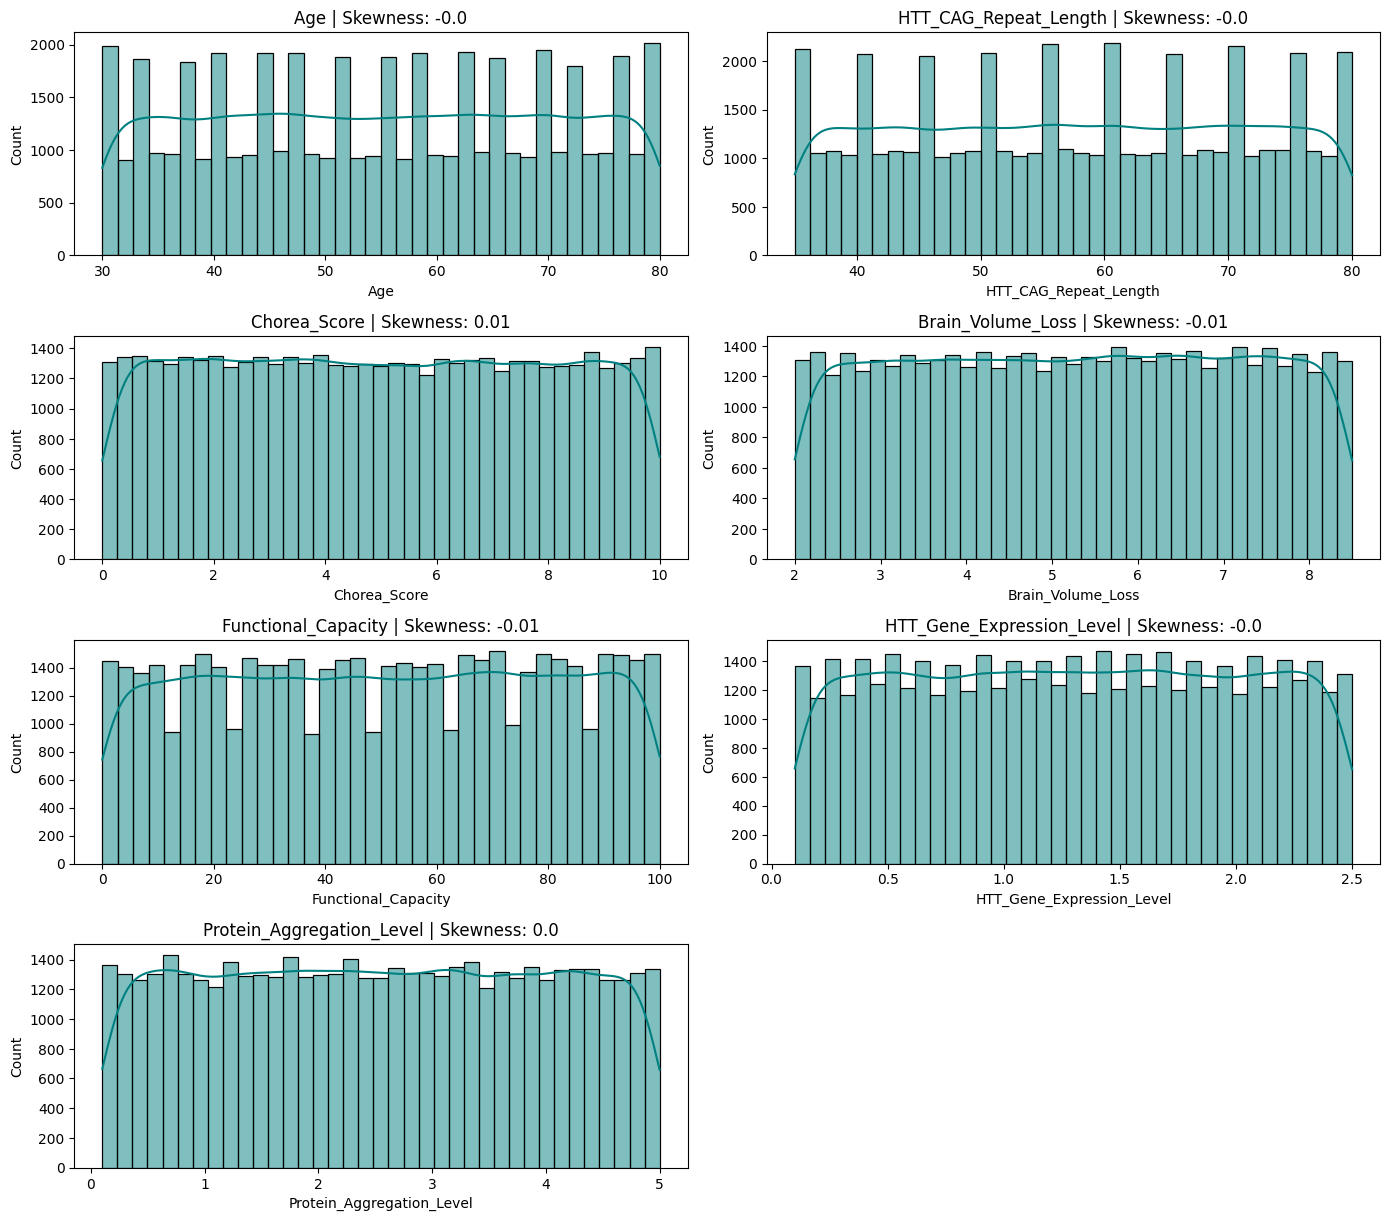


==== STEP 7: Bivariate Analysis ====



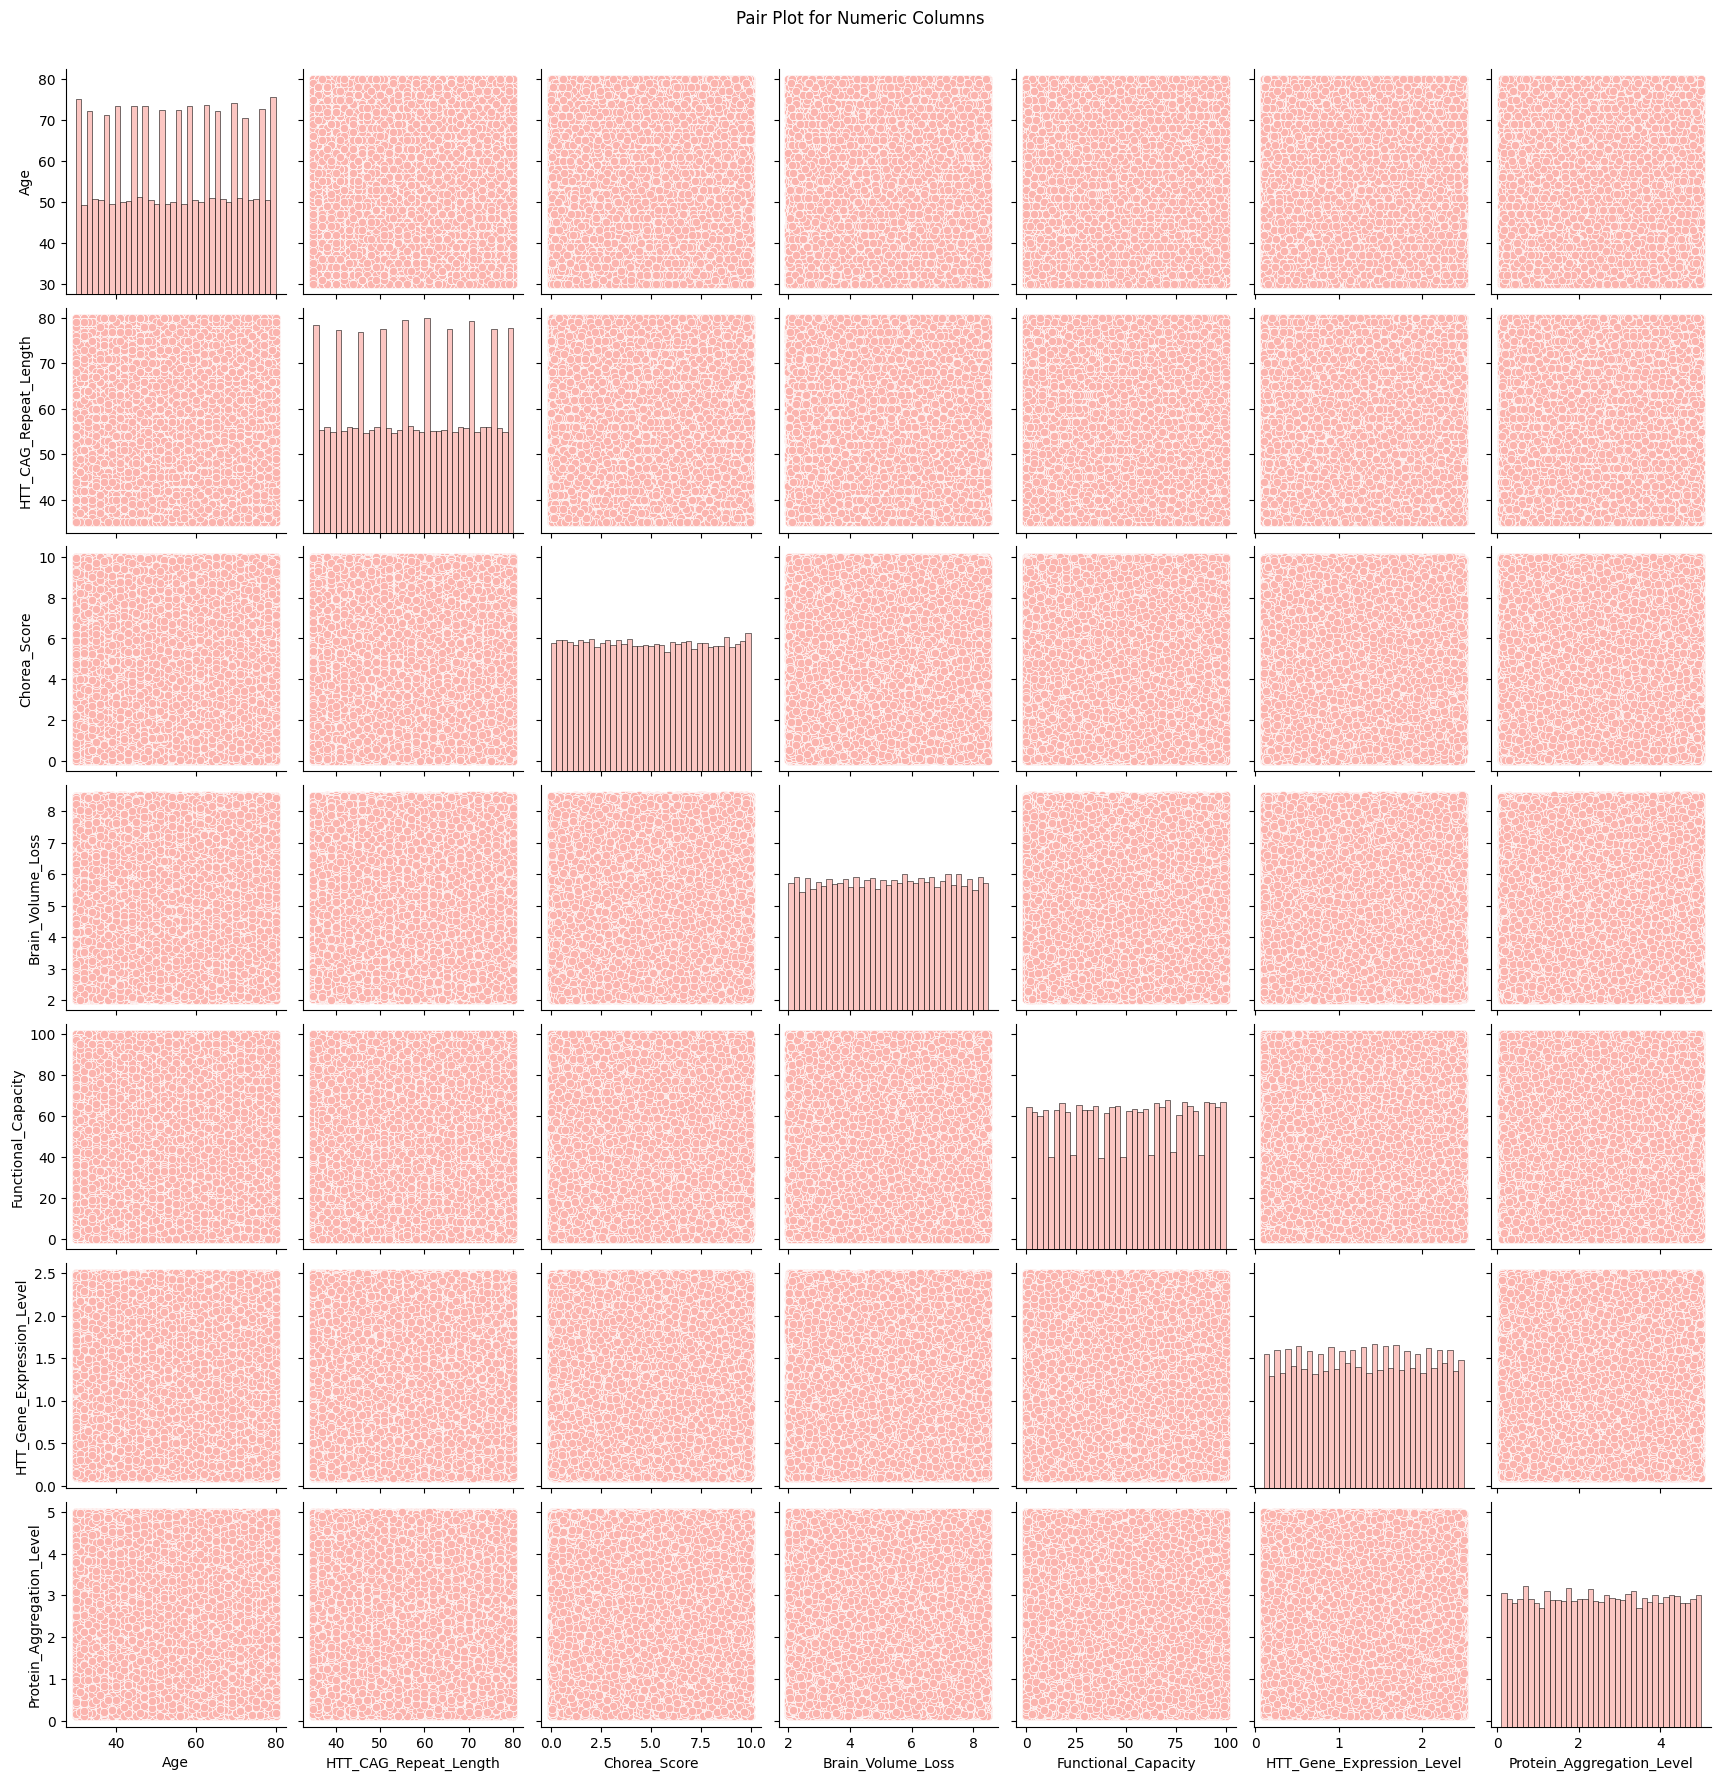


==== STEP 8: Multivariate Analysis (Correlation Heatmap) ====



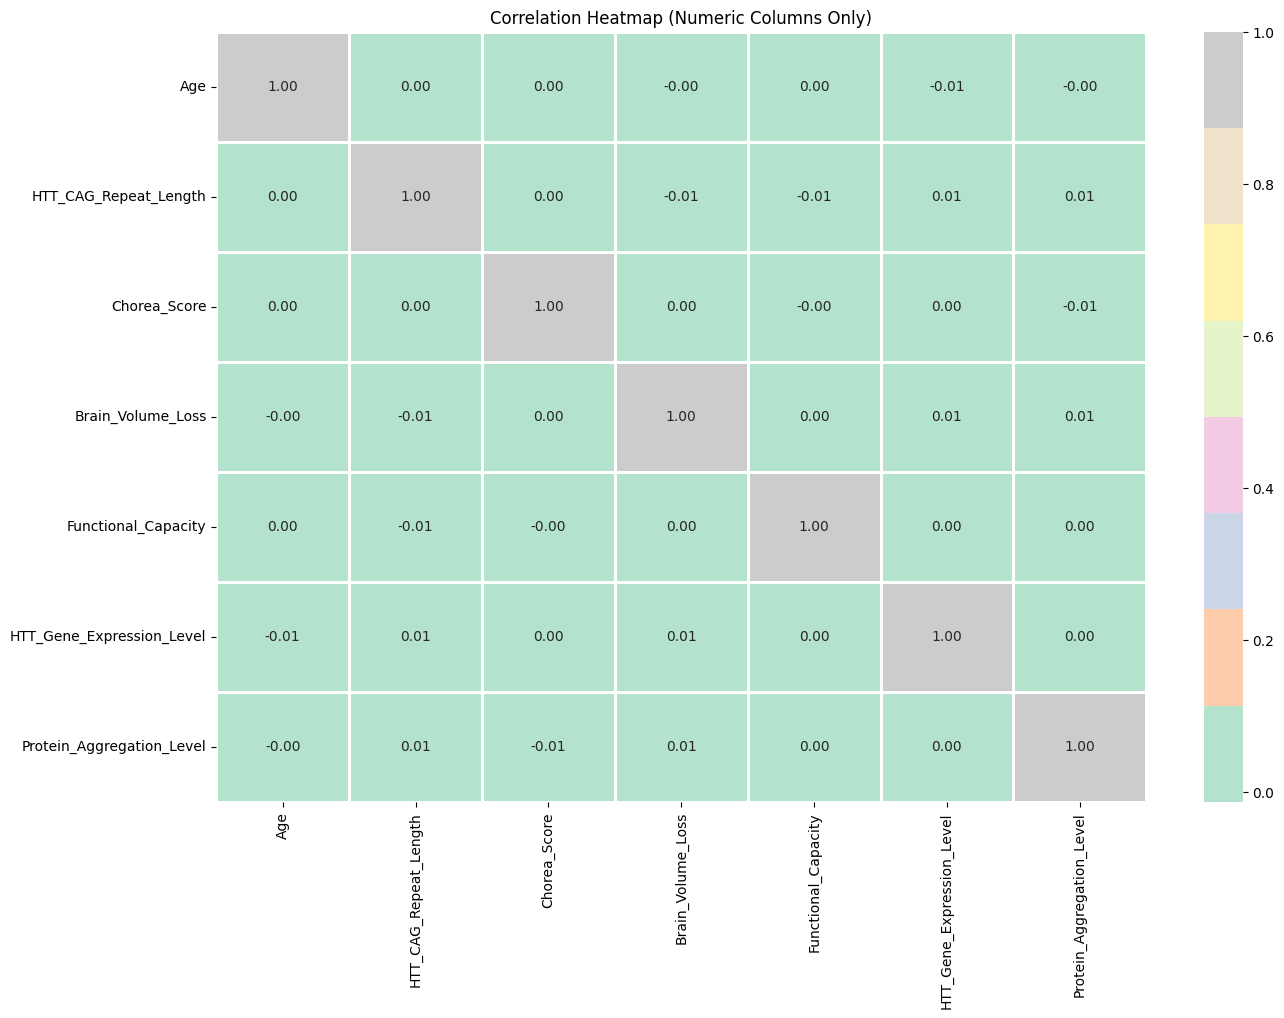


==== STEP 9: Data Cleaning & Preparation ====

Missing values, duplicates, and outliers handled.


==== STEP 10: Feature Engineering ====


==== STEP 11: Data Transformation (Scaling) ====

Numeric columns scaled using StandardScaler.


==== Final Cleaned Dataset Info ====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48536 entries, 0 to 48535
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 48536 non-null  object 
 1   Age                        48536 non-null  float64
 2   Sex                        48536 non-null  object 
 3   Family_History             48536 non-null  object 
 4   HTT_CAG_Repeat_Length      48536 non-null  float64
 5   Motor_Symptoms             48536 non-null  object 
 6   Cognitive_Decline          48536 non-null  object 
 7   Chorea_Score               48536 non-null  float64
 8   Brain_Volume_Loss          48536 non-null  float64

In [3]:
# ===================== STEP 1: IMPORT REQUIRED LIBRARIES =====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import files
import warnings as wr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
wr.filterwarnings('ignore')

print("\n==== STEP 1: Libraries Imported Successfully ====\n")

# ===================== STEP 2: UPLOAD AND LOAD DATASET =====================
uploaded = files.upload()  # Upload your Huntington dataset zip
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/")

extracted_files = os.listdir("/content/")
csv_file = [f for f in extracted_files if f.endswith(".csv")][0]
csv_path = os.path.join("/content/", csv_file)

df = pd.read_csv(csv_path)
print("\n==== STEP 2: Dataset Loaded Successfully ====\n")
print(df.head(), "\n")
print("Dataset Info:\n")
print(df.info(), "\n")

# ===================== STEP 3: ANALYZING THE DATA =====================
print("\n==== STEP 3: Basic Data Analysis ====\n")
print("Dataset Shape:", df.shape, "\n")
print("Columns:", df.columns.tolist(), "\n")
print("Missing Values per Column:\n", df.isnull().sum(), "\n")
print("Unique Values per Column:\n", df.nunique(), "\n")
print("Statistical Summary (Numeric Columns):\n", df.describe().T, "\n")

# ===================== STEP 4: CHECKING MISSING VALUES =====================
print("\n==== STEP 4: Missing Values Heatmap ====\n")
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# ===================== STEP 5: CHECKING DUPLICATES =====================
duplicates = df.duplicated().sum()
print("\n==== STEP 5: Checking Duplicates ====\n")
print(f"Total Duplicate Rows: {duplicates}\n")
df.drop_duplicates(inplace=True)

# ===================== STEP 6: UNIVARIATE ANALYSIS =====================
print("\n==== STEP 6: Univariate Analysis ====\n")

# Count plot for target column
target_column = 'Status' if 'Status' in df.columns else df.columns[-1]
plt.figure(figsize=(8,6))
sns.countplot(x=target_column, data=df, palette='Set2')
plt.title(f'Count Plot of {target_column}')
plt.show()

# Histograms + KDE for numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(14, len(numeric_cols)*3))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, idx)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"{col} | Skewness: {round(df[col].skew(),2)}")
plt.tight_layout()
plt.show()

# Swarm Plot
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.swarmplot(x='Status', y='Age', data=df, palette='viridis')
    plt.title('Swarm Plot for Status vs Age')
    plt.show()

# ===================== STEP 7: BIVARIATE ANALYSIS =====================
print("\n==== STEP 7: Bivariate Analysis ====\n")

# Pairplot for numeric columns
sns.set_palette("Pastel1")
sns.pairplot(df.select_dtypes(include=['int64','float64']))
plt.suptitle('Pair Plot for Numeric Columns', y=1.02)
plt.show()

# Violin plot example
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Status', y='Age', data=df, palette='Set3', alpha=0.7)
    plt.title('Violin Plot: Status vs Age')
    plt.show()

# Box plot example
if 'Status' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Status', y='Age', data=df)
    plt.title('Box Plot: Status vs Age')
    plt.show()

# ===================== STEP 8: MULTIVARIATE ANALYSIS =====================
print("\n==== STEP 8: Multivariate Analysis (Correlation Heatmap) ====\n")
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

# ===================== STEP 9: DATA CLEANING & PREPARATION =====================
print("\n==== STEP 9: Data Cleaning & Preparation ====\n")

# Handle missing values
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Handle outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("Missing values, duplicates, and outliers handled.\n")

# ===================== STEP 10: FEATURE ENGINEERING =====================
print("\n==== STEP 10: Feature Engineering ====\n")
# Example: Risk score based on Age and CAG repeats
if 'Age' in df.columns and 'CAG_repeats' in df.columns:
    df['Risk_Score'] = df['Age'] * df['CAG_repeats']
    print("Feature 'Risk_Score' created.\n")

# ===================== STEP 11: DATA TRANSFORMATION =====================
print("\n==== STEP 11: Data Transformation (Scaling) ====\n")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Numeric columns scaled using StandardScaler.\n")

# ===================== FINAL DATASET PREVIEW =====================
print("\n==== Final Cleaned Dataset Info ====\n")
print(df.info())
print("\n==== Head of Cleaned Dataset ====\n")
print(df.head())
